# **Maestría en Inteligencia Artificial Aplicada**

## **Curso: Inteligencia Artificial y Aprendizaje Automático**

#### Tecnológico de Monterrey

#### Prof Luis Eduardo Falcón Morales

### Adtividad de Semanas 6 y 7

### **Campañas publicitarias en redes sociales - Modelos de Regresión**



### **Nombre y Matrícula de integrantes del Equipo:**


*   Elemento de lista
*   Elemento de lista
*   Elemento de lista


# **Introducción**

### **Trabajaremos con el archivo "dataset_Facebook.csv" que encuentras en la siguiente liga:**

https://archive.ics.uci.edu/dataset/368/facebook+metrics

### **Estos datos están asociados al siguiente artículo que apareció en la revista *Journal of Business Research*, Moro et.al., de la editorial ELSEVIER. Descarga el archivo en formato PDF, el cual te ayudará a responder algunas de las preguntas de esta actividad (el artículo tiene acceso sin costo):**

https://www.semanticscholar.org/paper/Predicting-social-media-performance-metrics-and-of-Moro-Rita/dec55692590820754b53c916e29bb2b42c0e5104


### **En el resto de la actividad pueden agregar más celdas y líneas de código cuando así lo consideren adecuado.**

In [1]:
# Incluir las librerías que consideren necesarias ...

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

np.random.seed(0)

from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
import shap

plt.style.use('seaborn-v0_8')

c:\Coding\Masters\AI-ML\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Cargamos los datos del archivo:

data_path = Path('facebook+metrics/dataset_Facebook.csv')
if not data_path.exists():
    data_path = Path('Week 6') / 'facebook+metrics' / 'dataset_Facebook.csv'

data = pd.read_csv(data_path, sep=';', header='infer')
print('Total de registros y variables:', data.shape)
data.head(3).T

Total de registros y variables: (500, 19)


,0,1,2
Page total likes,139441,139441,139441
Type,Photo,Status,Photo
Category,2,2,3
Post Month,12,12,12
Post Weekday,4,3,3
Post Hour,3,10,3
Paid,0.0,0.0,0.0
Lifetime Post Total Reach,2752,10460,2413
Lifetime Post Total Impressions,5091,19057,4373
Lifetime Engaged Users,178,1457,177


# **Ejercicio 1**


### **Contesta las siguientes preguntas basándote en la información del artículo de Moro et.al.**



## **Ejercicio 1-a:**

*   **¿Cuál es el problema y el objetivo a resolver que se describe en el artículo?**  

### ++++++++ Inicia la sección de agregar texto: +++++++++++

El problema es predecir el desempeño de publicaciones en redes sociales (específicamente Facebook) en términos de métricas como alcance, engagement e interacciones. El objetivo es ayudar a los administradores de redes sociales a optimizar sus estrategias de contenido mediante la predicción de qué características de las publicaciones (tipo, categoría, momento de publicación, si es paga o no) generarán mayor impacto en los consumidores de contenido.

### ++++++++ Termina la sección de agregar texto. +++++++++++

## **Ejercicio 1-b:**

*   **Describe a continuación el significado de las 19 variables de acuerdo a la información de las Tablas 1, 2 y 3 del artículo.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

1. **Page total likes:** Número total de "me gusta" que tiene la página de Facebook al momento de la publicación.
2. **Type:** Tipo de contenido de la publicación (Foto, Video, Link, Estado).
3. **Category:** Categoría del contenido de la publicación (acción, producto, inspiración).
4. **Post Month:** Mes en que se publicó el contenido (1-12).
5. **Post Weekday:** Día de la semana en que se publicó (1-7).
6. **Post Hour:** Hora del día en que se publicó (0-23).
7. **Paid:** Indicador binario si la publicación fue promocionada (paga) o no.
8. **Lifetime Post Total Reach:** Número total de personas que vieron la publicación.
9. **Lifetime Post Total Impressions:** Número total de veces que la publicación fue mostrada.
10. **Lifetime Engaged Users:** Número de usuarios que interactuaron con la publicación.
11. **Lifetime Post Consumers:** Número de personas que hicieron clic en la publicación.
12. **Lifetime Post Consumptions:** Número total de clics en la publicación.
13. **Lifetime Post Impressions by people who have liked your Page:** Impresiones entre seguidores de la página.
14. **Lifetime Post reach by people who like your Page:** Alcance entre seguidores de la página.
15. **Lifetime People who have liked your Page and engaged with your post:** Seguidores que interactuaron con la publicación.
16. **comment:** Número de comentarios en la publicación.
17. **like:** Número de "me gusta" en la publicación.
18. **share:** Número de veces que se compartió la publicación.
19. **Total Interactions:** Suma total de comentarios, me gusta y compartidos.

### ++++++++ Termina la sección de agregar texto. +++++++++++

# **Ejercicio 2**

### **Variables relacionadas con el tiempo**

### **Recordemos que algunas variables relacionadas con información del tiempo (como estación, mes, día, hora) pueden considerarse como variables categóricas o numéricas cíclicas, dependiendo del contexto y decisión del analista. En particular, para el caso de este problema las variables mes, día de la semana y hora en que se puso el post, podrían considerarse como variables categóricas ordinales o nominales. Sin embargo, para fines de este Actividad las van a transformar a numéricas cíclicas, como se les indica a continuación.**

### **En la Tabla 3 del artículo de ELSEVIER nos comentan que la variable *Post_hour* está etiquetada de 0 a 23, por lo que las 24 horas sería equivalente a las 0 horas. Es decir, se tiene un comportamiento cíclico de 24 horas, que en términos matemáticos se dice que es una variable cíclica módulo 24. De manera análoga se aplica este razonamiento a las variables mes y día de la semana para poder ser consideradas como cíclicas.**

### **En la misma Tabla 3 del artículo se menciona que las variables *Post_month* y *Post_hour* están registradas con los nombres de los meses y de cada día de la semana. Sin embargo, en el archivo en realidad se observa que están capturadas como numéricas del 1 al 12 y del 1 al 7, respectivamente.**


## **Ejercicio 2-a:**

* **Investiga y escribe a continuación las fórmulas de cómo se transforma una variable temporal cíclica T, de periodicidad M, en dos nuevas variables usando funciones trigonométricas.**  

### ++++++++ Inicia la sección de agregar texto: +++++++++++

Para transformar una variable cíclica T con periodicidad M en dos nuevas variables usando funciones trigonométricas, se utilizan las siguientes fórmulas:

$$T_{sin} = \sin\left(\frac{2\pi \cdot T}{M}\right)$$

$$T_{cos} = \cos\left(\frac{2\pi \cdot T}{M}\right)$$

Donde:
- $T$ es el valor de la variable temporal original
- $M$ es el período de la variable (por ejemplo, 24 para horas, 7 para días de la semana, 12 para meses)
- $2\pi$ representa una vuelta completa en radianes

### ++++++++ Termina la sección de agregar texto. +++++++++++

## **Ejercicio 2-b:**

* **Explica por qué deben utilizarse dos funciones trigonométricas en la transformación de variables cíclicas, en lugar de solo una. Incluye un ejemplo numérico cualquiera que ayude a clarificar tu respuesta.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

Se utilizan dos funciones trigonométricas (seno y coseno) en lugar de una sola porque se necesita representar de forma única cada punto en el ciclo. Una sola función trigonométrica es ambigua.

**Ejemplo numérico:** Consideremos las horas del día (período M=24):
- Hora 3: sin(2π·3/24) ≈ 0.707, cos(2π·3/24) ≈ 0.707
- Hora 9: sin(2π·9/24) ≈ 0.707, cos(2π·9/24) ≈ -0.707

Si solo usáramos seno, las horas 3 y 9 tendrían el mismo valor (≈0.707), cuando en realidad son horas diferentes con comportamientos distintos. Al usar ambas funciones, el par (sin, cos) identifica de manera única cada hora: (0.707, 0.707) vs (0.707, -0.707).

Además, seno y coseno juntos preservan la distancia cíclica: la hora 23 está cerca de la hora 0, y esto se refleja en que sus representaciones (sin, cos) están próximas en el espacio 2D.

### ++++++++ Termina la sección de agregar texto. +++++++++++

## **Ejercicio 2-c:**

* **Una vez transformada una variable temporal con las dos funciones trigonométricas, cuál sería la recomendación para esta variable original, ¿seguirla manteniendo en el DataFrame o eliminarla? Justifica tu respuesta.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

**Recomendación: Eliminar la variable original del DataFrame.**

**Justificación:**
1. **Evitar redundancia:** Las dos variables transformadas (sin y cos) ya contienen toda la información de la variable original, pero en un formato más apropiado para modelos de ML.

2. **Prevenir confusión del modelo:** Si se mantiene la variable original numérica (por ejemplo, mes=12), el modelo podría interpretarla incorrectamente como una escala ordinal donde diciembre (12) está "más lejos" de enero (1) que de noviembre (11), cuando en realidad diciembre está adyacente a enero en el calendario.

3. **Reducir dimensionalidad:** Mantener tres variables (original + sin + cos) aumenta innecesariamente la dimensionalidad sin aportar información adicional.

4. **Consistencia:** Si el objetivo era capturar la naturaleza cíclica, la representación original lineal contradice esta intención.

### ++++++++ Termina la sección de agregar texto. +++++++++++

## **Ejercicio 2-d:**

* **Enumera al menos tres ventajas y tres desventajas de usar una representación de las variables temporales en términos de dos funciones trigonométricas.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

**Ventajas:**
1. **Captura de ciclicidad:** Representa correctamente que valores extremos están próximos (hora 23 cerca de hora 0).
2. **Mejor rendimiento en modelos lineales:** Facilita que modelos lineales capturen patrones cíclicos que de otra forma requerirían interacciones polinomiales complejas.
3. **Preservación de distancias:** Mantiene la similitud entre valores temporales cercanos en el ciclo.

**Desventajas:**
1. **Pérdida de interpretabilidad:** Es menos intuitivo explicar que "hora_sin = 0.5" que decir "hora 2 de la tarde".
2. **Aumento de dimensionalidad:** Cada variable temporal se convierte en dos, lo que puede ser problemático con muchas variables cíclicas.
3. **Asunción de periodicidad perfecta:** Asume que el patrón se repite exactamente cada ciclo, lo cual puede no ser cierto (por ejemplo, diciembre tiene comportamiento único por festividades que no se repite en enero).

### ++++++++ Termina la sección de agregar texto. +++++++++++

## **Ejercicio 2-e:**

* **¿Qué riesgos éticos podrían estar surgiendo en un problema si no se representa correctamente una variable temporal? Responde con base al contexto de este problema e incluye otro ejemplo donde también pudiera existir un problema ético al no transformar adecuadamente una variable cíclica.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

**Riesgos éticos en este problema:**
Si no se representa correctamente la hora de publicación, el modelo podría recomendar publicar a horas inapropiadas o subóptimas. Por ejemplo, si se trata hora=23 como "más lejana" de hora=1 que de hora=21, podría recomendar publicaciones nocturnas cuando la audiencia objetivo está durmiendo, desperdiciando recursos publicitarios del cliente y generando frustración.

**Otro ejemplo - Sistema de salud:**
En un modelo que predice riesgo de ataques cardíacos según la hora del día, no representar correctamente la ciclicidad podría fallar en detectar que hay picos de riesgo al amanecer (6-9 AM). Si el modelo trata hora=6 como "distante" de hora=23, podría no capturar que pacientes con síntomas a las 5-7 AM tienen patrones similares a los de medianoche-2 AM (ambos en periodo de sueño/despertar). Esto podría resultar en falta de alertas tempranas y atención inadecuada, poniendo vidas en riesgo por una decisión técnica aparentemente menor en el preprocesamiento de datos.

### ++++++++ Termina la sección de agregar texto. +++++++++++

# **Ejercicio 3**

In [3]:
# Ejercicio 3a.

# Transforma la variable "Post Hour" incluyendo las variables
# hour_sin, hour_cos y eliminando la original.

# ++++++++++++++ Incluye aquí tu código ++++++++++++++++++++++++++++++

# La hora tiene periodicidad de 24
data['hora_sin'] = np.sin(2 * np.pi * data['Post Hour'] / 24)
data['hora_cos'] = np.cos(2 * np.pi * data['Post Hour'] / 24)
data = data.drop('Post Hour', axis=1)

hour_sin = data['hora_sin']
hour_cos = data['hora_cos']

# +++++++++++++ Termina sección de agregar código +++++++++++++++++++++

print("Transformación de Post Hour completada")
print(f"hora_sin shape: {hour_sin.shape}, hora_cos shape: {hour_cos.shape}")

Transformación de Post Hour completada
hora_sin shape: (500,), hora_cos shape: (500,)


In [4]:
# Ejercicio 3b.

# Transforma la variable "Post Weekday" incluyendo las variables
# day_sin, day_cos y eliminando la original.

# ++++++++++++++ Incluye aquí tu código ++++++++++++++++++++++++++++++

# El día de la semana tiene periodicidad de 7
data['dia_sin'] = np.sin(2 * np.pi * data['Post Weekday'] / 7)
data['dia_cos'] = np.cos(2 * np.pi * data['Post Weekday'] / 7)
data = data.drop('Post Weekday', axis=1)

day_sin = data['dia_sin']
day_cos = data['dia_cos']

# +++++++++++++ Termina sección de agregar código +++++++++++++++++++++

print("Transformación de Post Weekday completada")
print(f"dia_sin shape: {day_sin.shape}, dia_cos shape: {day_cos.shape}")

Transformación de Post Weekday completada
dia_sin shape: (500,), dia_cos shape: (500,)


In [5]:
# Ejercicio 3c.

# Transforma la variable "Post Month" incluyendo las variables
# month_sin, month_cos y eliminando la original.

# ++++++++++++++ Incluye aquí tu código ++++++++++++++++++++++++++++++

# El mes tiene periodicidad de 12
data['mes_sin'] = np.sin(2 * np.pi * data['Post Month'] / 12)
data['mes_cos'] = np.cos(2 * np.pi * data['Post Month'] / 12)
data = data.drop('Post Month', axis=1)

month_sin = data['mes_sin']
month_cos = data['mes_cos']

# +++++++++++++ Termina sección de agregar código +++++++++++++++++++++

print("Transformación de Post Month completada")
print(f"mes_sin shape: {month_sin.shape}, mes_cos shape: {month_cos.shape}")

Transformación de Post Month completada
mes_sin shape: (500,), mes_cos shape: (500,)


In [6]:
# Veamos lo que tenemos hasta el momento:
print("Dimensión del conjunto de datos:",data.shape)
data.head(3).T

Dimensión del conjunto de datos: (500, 22)


,0,1,2
Page total likes,139441,139441,139441
Type,Photo,Status,Photo
Category,2,2,3
Paid,0.0,0.0,0.0
Lifetime Post Total Reach,2752,10460,2413
Lifetime Post Total Impressions,5091,19057,4373
Lifetime Engaged Users,178,1457,177
Lifetime Post Consumers,109,1361,113
Lifetime Post Consumptions,159,1674,154
Lifetime Post Impressions by people who have liked your Page,3078,11710,2812


In [7]:
# De las Tablas 2 y 3 del artículo de Moro et.al. seleccionamos las variables que
# trabajaremos en esta Actividad y con las transformaciones que se acaban de hacer.

# Para esta Actividad se trabajará con la variable de salida "Lifetime Post Consumers",
# que es una de las variables de salida con las que los autores del artículo
# reportaron que obtuvieron uno de los mejores resultados.

X = data[['Page total likes', 'Type', 'Category', 'Paid',
          'mes_sin', 'mes_cos', 'dia_sin', 'dia_cos', 'hora_sin', 'hora_cos']]
y = data[['Lifetime Post Consumers']]

# Particionemos como se indica a continuación en Train, Val y Test:
Xtrain, Xtv, ytrain, ytv = train_test_split(X, y, train_size=0.75, shuffle=True, random_state=5)
Xval, Xtest, yval, ytest = train_test_split(Xtv, ytv, train_size=0.5, shuffle=True, random_state=5)

print('Train:', Xtrain.shape, ytrain.shape)
print('Train:', Xval.shape, yval.shape)
print('Test:', Xtest.shape, ytest.shape)

Train: (375, 10) (375, 1)
Train: (62, 10) (62, 1)
Test: (63, 10) (63, 1)


# **Ejercicio 4**

* **Realiza un análisis de la variable de salida y aplicarle la transformación que consideres más adecuada a los conjuntos Train, Val y Test. A las nuevas variables llamarlas ytrain2, yval2 y ytest2.**

Análisis de la variable de salida 'Lifetime Post Consumers':
       Lifetime Post Consumers
count               375.000000
mean                825.200000
std                 967.721545
min                   9.000000
25%                 323.500000
50%                 547.000000
75%                 994.500000
max               11328.000000

Asimetría (skewness): 4.934992317806204
Curtosis: 40.6638074809451


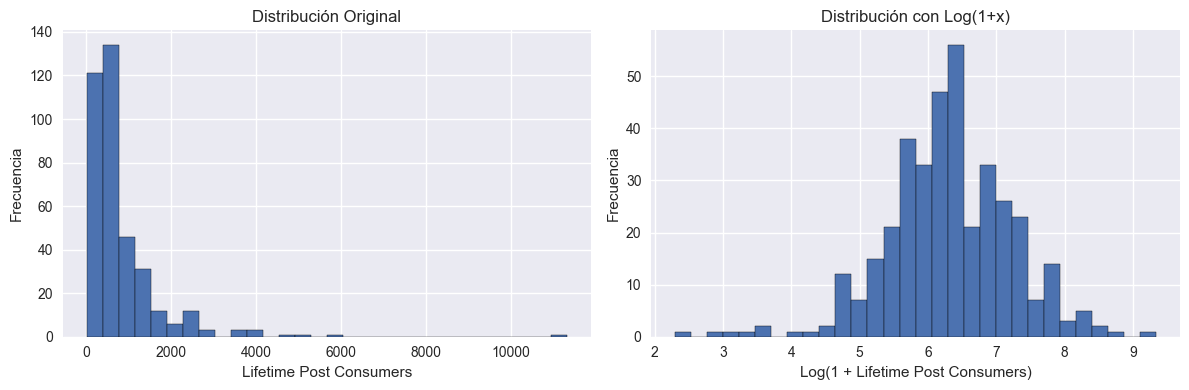


Después de transformación log1p:
Asimetría: -0.38264465249809926
Curtosis: 1.6919360434817694


In [8]:
# Ejercicio 4.

# ++++++++++++++ Inicia sección de agregar código +++++++++++++++++++

# Primero analicemos la distribución de la variable de salida
print("Análisis de la variable de salida 'Lifetime Post Consumers':")
print(ytrain.describe())
print("\nAsimetría (skewness):", ytrain['Lifetime Post Consumers'].skew())
print("Curtosis:", ytrain['Lifetime Post Consumers'].kurtosis())

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Histograma original
axes[0].hist(ytrain['Lifetime Post Consumers'], bins=30, edgecolor='black')
axes[0].set_title('Distribución Original')
axes[0].set_xlabel('Lifetime Post Consumers')
axes[0].set_ylabel('Frecuencia')

# Histograma con transformación logarítmica
axes[1].hist(np.log1p(ytrain['Lifetime Post Consumers']), bins=30, edgecolor='black')
axes[1].set_title('Distribución con Log(1+x)')
axes[1].set_xlabel('Log(1 + Lifetime Post Consumers)')
axes[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# La variable tiene distribución muy sesgada (skewed), aplicamos transformación logarítmica
ytrain2 = np.log1p(ytrain)  # log1p es log(1+x) para evitar log(0)
yval2 = np.log1p(yval)
ytest2 = np.log1p(ytest)

print("\nDespués de transformación log1p:")
print("Asimetría:", ytrain2['Lifetime Post Consumers'].skew())
print("Curtosis:", ytrain2['Lifetime Post Consumers'].kurtosis())

# ++++++++++++++ Termina sección de agregar código ++++++++++++++++++

# **Ejercicio 5**

* **En la Figura 5 del artículo de Moro et.al. se indica que no se cuenta con un valor de partida para el modelo base (Baseline) de acuerdo a la experiencia que se tiene del problema y en particular con respecto a la métrica MAPE.**

* **Sin embargo, para fines de esta actividad y ya que utilizaremos las curvas de aprendizaje, nos basaremos en el error cuadrático medio MSE, para supervisar que nuestros modelos no queden sub-entrenados o sobre-entrenados durante el entrenamiento.**


In [9]:
# Ejercicio 5

# Obtener el umbral del problema a resolver con base a la métrica MSE
# y a la variable de salida con la transformación aplicada.
# Llamar "mse_baseline" al valor de dicho umbral.

# ++++++++++++++ Inicia sección de agregar código +++++++++++++++++++

# Para obtener el baseline, usamos el promedio como predicción
# y calculamos el MSE en el conjunto de validación

baseline_prediction = ytrain2.mean()
mse_baseline = mean_squared_error(yval2, np.full(yval2.shape, baseline_prediction))

# ++++++++++++++ Termina sección de agregar código +++++++++++++++++++

# Imprimimos el valor de la métrica MSE del modelo base:
print(f"MSE Baseline (promedio) con Y transformada: {mse_baseline:.2f}")

MSE Baseline (promedio) con Y transformada: 0.68


# **Ejercicio 6**

* **Realiza un análisis de las variables de entrada y determina qué transformaciones sería adecuado aplicar a cada una. En particular, para las variables categóricas verifica si cada nivel cumple el criterio de tener al menos un 5% de información.**

NOTA: Se aplicará posteriormente un Pipeline para conjuntar las transformaciones de las variables de entrada, por lo que por el momento no es necesario transformar los datos de los conjuntos Val y Test.

In [10]:
# Ejercicio 6

# Análisis de variables

# ++++++++++++++ Inicia sección de agregar código +++++++++++++++++++

print("=== ANÁLISIS DE VARIABLES DE ENTRADA ===\n")

# Identificar variables numéricas y categóricas
numerical_cols = ['Page total likes', 'mes_sin', 'mes_cos', 'dia_sin', 'dia_cos', 'hora_sin', 'hora_cos']
categorical_cols = ['Type', 'Category', 'Paid']

print("Variables numéricas:", numerical_cols)
print("Variables categóricas:", categorical_cols)
print("\n")

# Análisis de variables categóricas - verificar criterio del 5%
print("=== ANÁLISIS DE VARIABLES CATEGÓRICAS ===")
for col in categorical_cols:
    print(f"\n{col}:")
    freq = Xtrain[col].value_counts(normalize=True)
    print(freq.to_frame(name='Proporción'))
    
    # Verificar si algún nivel tiene menos del 5%
    rare_levels = freq[freq < 0.05]
    if len(rare_levels) > 0:
        print(f"  ⚠️ Niveles con <5%: {list(rare_levels.index)}")
    else:
        print(f"  ✓ Todos los niveles tienen ≥5%")

# Análisis de variables numéricas
print("\n\n=== ANÁLISIS DE VARIABLES NUMÉRICAS ===")
print(Xtrain[numerical_cols].describe().T)

print("\n=== DECISIONES DE TRANSFORMACIÓN ===")
print("1. Variables numéricas continuas: Aplicar StandardScaler (Page total likes)")
print("2. Variables trigonométricas (sin/cos): Ya están en [-1,1], no necesitan escalado")
print("3. Variables categóricas: Aplicar OneHotEncoder")
print("4. Paid: Es binaria (0/1), puede tratarse como categórica con OHE")

# ++++++++++++++ Termina sección de agregar código ++++++++++++++++++

=== ANÁLISIS DE VARIABLES DE ENTRADA ===

Variables numéricas: ['Page total likes', 'mes_sin', 'mes_cos', 'dia_sin', 'dia_cos', 'hora_sin', 'hora_cos']
Variables categóricas: ['Type', 'Category', 'Paid']


=== ANÁLISIS DE VARIABLES CATEGÓRICAS ===

Type:
        Proporción
Type              
Photo     0.850667
Status    0.093333
Link      0.040000
Video     0.016000
  ⚠️ Niveles con <5%: ['Link', 'Video']

Category:
          Proporción
Category            
1           0.421333
3           0.314667
2           0.264000
  ✓ Todos los niveles tienen ≥5%

Paid:
      Proporción
Paid            
0.0     0.700535
1.0     0.299465
  ✓ Todos los niveles tienen ≥5%


=== ANÁLISIS DE VARIABLES NUMÉRICAS ===
                  count           mean           std           min  \
Page total likes  375.0  123466.202667  16150.793818  81370.000000   
mes_sin           375.0      -0.065142      0.683375     -1.000000   
mes_cos           375.0      -0.017403      0.728775     -1.000000   
dia_sin     

# **Ejercicio 7**

* **Define a continuación las transformaciones de las variables de entrada que determinaste son las más adecuadas y usando la clase Pipeline para evitar el filtrado de información.**

In [11]:
# Ejercicio 7

# Incluye a continuación las transformaciones a las variables numéricas
# y categóricas usando la clase Pipeline y conjuntando todas en la
# variable que llamaremos "columnasTransformer".

# ++++++++++++++ Inicia sección de agregar código +++++++++++++++++++

# Variables a escalar (solo Page total likes necesita escalado)
numeric_to_scale = ['Page total likes']

# Variables trigonométricas que ya están en [-1, 1]
numeric_passthrough = ['mes_sin', 'mes_cos', 'dia_sin', 'dia_cos', 'hora_sin', 'hora_cos']

# Variables categóricas
categorical_features = ['Type', 'Category', 'Paid']

# Crear el ColumnTransformer
columnasTransformer = ColumnTransformer(
    transformers=[
        ('num_scaler', StandardScaler(), numeric_to_scale),
        ('num_passthrough', 'passthrough', numeric_passthrough),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ],
    remainder='drop'
)

# ++++++++++++++ Termina sección de agregar código +++++++++++++++++++

# Visualicemos las transformaciones incluídas:
columnasTransformer

,transformers,"[('num_scaler', ...), ('num_passthrough', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,copy,True
,with_mean,True
,with_std,True


In [12]:
# A manera de información veamos la dimensión de las variables transformadas:

tmp = columnasTransformer.fit_transform(Xtrain)
print('Dimensión de las variables de entrada original:', tmp.shape)
print('Dimensión de las variables de entrada transformadas:', tmp.shape)

Dimensión de las variables de entrada original: (375, 14)
Dimensión de las variables de entrada transformadas: (375, 14)


In [13]:
# Como vamos a utilizar Validación Cruzada conjuntemos los conjuntos
# Train y Val en las nuevas variables llamadas Xtrainval y  ytrainval:

Xtrainval = pd.concat([Xtrain, Xval])
ytrainval2 = pd.concat([ytrain2, yval2])


# **Ejercicio 8**

In [14]:
# Ejercicio 8

# Busca los mejores valores de hiperparámetros del modelo Bosque Aleatorio.
# Utiliza el mismo valor de la semilla que se indica.

# ++++++++++++++ Incluye aquí tu código ++++++++++++++++++++++++++++++

# Primero, hagamos una búsqueda de hiperparámetros
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_search = RandomForestRegressor(random_state=1, n_jobs=-1)

# Crear pipeline temporal para búsqueda
pipeline_search = Pipeline([
    ('ct', columnasTransformer),
    ('m', rf_search)
])

# GridSearch
grid_rf = GridSearchCV(
    pipeline_search,
    {'m__' + k: v for k, v in param_grid_rf.items()},
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

print("Buscando mejores hiperparámetros para Random Forest...")
grid_rf.fit(Xtrainval, np.ravel(ytrainval2))

print(f"\nMejores parámetros: {grid_rf.best_params_}")
print(f"Mejor MSE (validación cruzada): {-grid_rf.best_score_:.4f}")

# Crear el modelo final con los mejores parámetros
best_params_rf = {k.replace('m__', ''): v for k, v in grid_rf.best_params_.items()}

modelo_RF = RandomForestRegressor(
    random_state=1,
    n_jobs=-1,
    **best_params_rf
)

# +++++++++++++ Termina sección de agregar código +++++++++++++++++++++

print("\nModelo Random Forest configurado con los mejores hiperparámetros")

Buscando mejores hiperparámetros para Random Forest...
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Mejores parámetros: {'m__max_depth': 10, 'm__min_samples_leaf': 2, 'm__min_samples_split': 2, 'm__n_estimators': 100}
Mejor MSE (validación cruzada): 0.5550

Modelo Random Forest configurado con los mejores hiperparámetros

Mejores parámetros: {'m__max_depth': 10, 'm__min_samples_leaf': 2, 'm__min_samples_split': 2, 'm__n_estimators': 100}
Mejor MSE (validación cruzada): 0.5550

Modelo Random Forest configurado con los mejores hiperparámetros


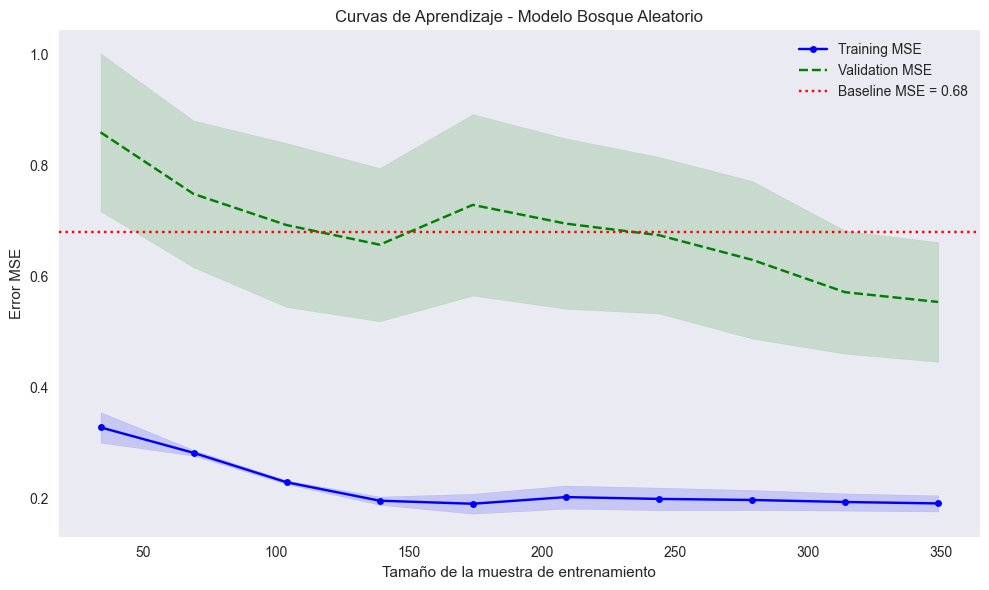


MSE Final en Validación: 0.5541
Mejora respecto al baseline: 18.5%


In [15]:
# Generar curvas de aprendizaje para el Random Forest

mipipe = Pipeline(steps=[('ct', columnasTransformer), ('m', modelo_RF)])

train_sizes, train_scores, val_scores = learning_curve(
    estimator=mipipe,
    X=Xtrainval,
    y=np.ravel(ytrainval2),
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# La siguiente información es para desplegar las curvas de aprendizaje.
# Calculamos los promedios y desviación estándar de entrenamiento para MSE.
# El negativo es porque sklearn nos devuelve en realidad el negativo de MSE.

mse_train_scores = -train_scores
mse_val_scores = -val_scores

train_mean = np.mean(mse_train_scores, axis=1)
train_std = np.std(mse_train_scores, axis=1, ddof=1)
val_mean = np.mean(mse_val_scores, axis=1)
val_std = np.std(mse_val_scores, axis=1, ddof=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training MSE')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, val_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation MSE')
plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='green')

plt.axhline(y=mse_baseline, color='red', linestyle=':', label=f'Baseline MSE = {mse_baseline:.2f}')
plt.title('Curvas de Aprendizaje - Modelo Bosque Aleatorio')
plt.xlabel('Tamaño de la muestra de entrenamiento')
plt.ylabel('Error MSE')
plt.grid()
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

print(f"\nMSE Final en Validación: {val_mean[-1]:.4f}")
print(f"Mejora respecto al baseline: {((mse_baseline - val_mean[-1])/mse_baseline * 100):.1f}%")

# **Ejercicio 9**

### **Repite el mismo proceso hecho en el ejercicio del Bosque Aleatorio para encontrar la mejor versión de cada uno de los siguientes modelos:**

*   **9a) Extreme Gradient Boost XGBoost**
*   **9b) Máquina de Vector Soporte SVM**
*   **9c) Red Neuronal Perceptrón Multicapa MLP**

=== XGBOOST MODEL ===

Buscando mejores hiperparámetros para XGBoost...
Fitting 5 folds for each of 8 candidates, totalling 40 fits

Mejores parámetros: {'m__learning_rate': 0.01, 'm__max_depth': 5, 'm__n_estimators': 200}
Mejor MSE (validación cruzada): 0.5404

Mejores parámetros: {'m__learning_rate': 0.01, 'm__max_depth': 5, 'm__n_estimators': 200}
Mejor MSE (validación cruzada): 0.5404


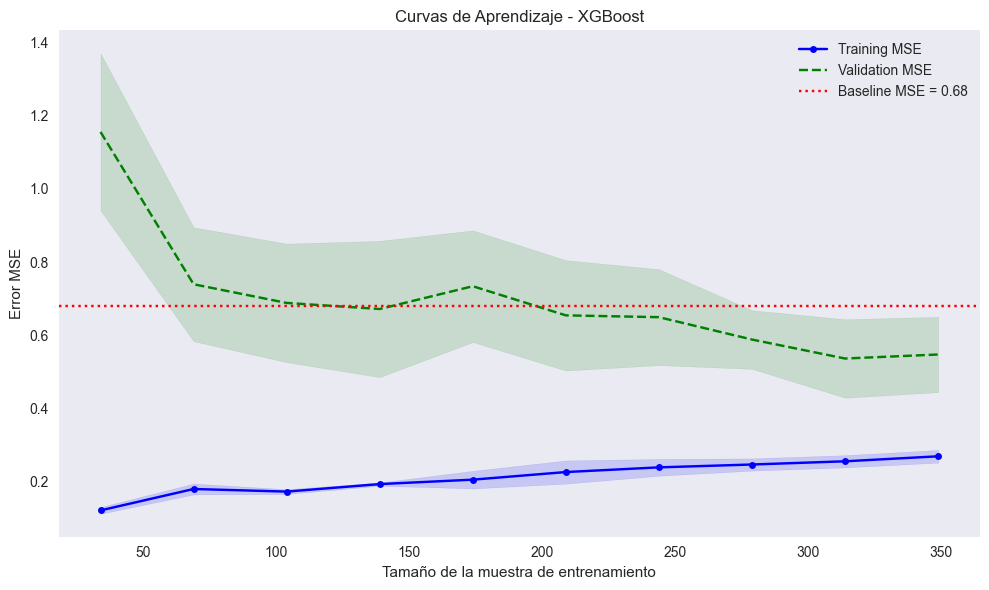


MSE Final en Validación (XGBoost): 0.5475
Mejora respecto al baseline: 19.5%


In [17]:
# Ejercicio 9a - XGBoost

# ++++++++++ Incluye las líneas y celdas de código deseadas ++++++++++++

print("=== XGBOOST MODEL ===\n")

# Búsqueda de hiperparámetros para XGBoost (reducida para evitar problemas de memoria)
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1]
}

xgb_search = XGBRegressor(random_state=1, n_jobs=4)

pipeline_xgb = Pipeline([
    ('ct', columnasTransformer),
    ('m', xgb_search)
])

grid_xgb = GridSearchCV(
    pipeline_xgb,
    {'m__' + k: v for k, v in param_grid_xgb.items()},
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=2,
    verbose=1
)

print("Buscando mejores hiperparámetros para XGBoost...")
grid_xgb.fit(Xtrainval, np.ravel(ytrainval2))

print(f"\nMejores parámetros: {grid_xgb.best_params_}")
print(f"Mejor MSE (validación cruzada): {-grid_xgb.best_score_:.4f}")

# Modelo con mejores parámetros
best_params_xgb = {k.replace('m__', ''): v for k, v in grid_xgb.best_params_.items()}
modelo_XGB = XGBRegressor(random_state=1, n_jobs=4, **best_params_xgb)

# Curvas de aprendizaje
pipe_xgb = Pipeline(steps=[('ct', columnasTransformer), ('m', modelo_XGB)])

train_sizes_xgb, train_scores_xgb, val_scores_xgb = learning_curve(
    estimator=pipe_xgb,
    X=Xtrainval,
    y=np.ravel(ytrainval2),
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_mean_squared_error',
    n_jobs=2
)

mse_train_xgb = -train_scores_xgb
mse_val_xgb = -val_scores_xgb
train_mean_xgb = np.mean(mse_train_xgb, axis=1)
train_std_xgb = np.std(mse_train_xgb, axis=1, ddof=1)
val_mean_xgb = np.mean(mse_val_xgb, axis=1)
val_std_xgb = np.std(mse_val_xgb, axis=1, ddof=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes_xgb, train_mean_xgb, color='blue', marker='o', markersize=5, label='Training MSE')
plt.fill_between(train_sizes_xgb, train_mean_xgb + train_std_xgb, train_mean_xgb - train_std_xgb, alpha=0.15, color='blue')
plt.plot(train_sizes_xgb, val_mean_xgb, color='green', marker='+', markersize=5, linestyle='--', label='Validation MSE')
plt.fill_between(train_sizes_xgb, val_mean_xgb + val_std_xgb, val_mean_xgb - val_std_xgb, alpha=0.15, color='green')
plt.axhline(y=mse_baseline, color='red', linestyle=':', label=f'Baseline MSE = {mse_baseline:.2f}')
plt.title('Curvas de Aprendizaje - XGBoost')
plt.xlabel('Tamaño de la muestra de entrenamiento')
plt.ylabel('Error MSE')
plt.grid()
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

print(f"\nMSE Final en Validación (XGBoost): {val_mean_xgb[-1]:.4f}")
print(f"Mejora respecto al baseline: {((mse_baseline - val_mean_xgb[-1])/mse_baseline * 100):.1f}%")

=== SVM MODEL ===

Buscando mejores hiperparámetros para SVM...
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Mejores parámetros: {'m__C': 1, 'm__epsilon': 0.2, 'm__kernel': 'rbf'}
Mejor MSE (validación cruzada): 0.5522

Mejores parámetros: {'m__C': 1, 'm__epsilon': 0.2, 'm__kernel': 'rbf'}
Mejor MSE (validación cruzada): 0.5522


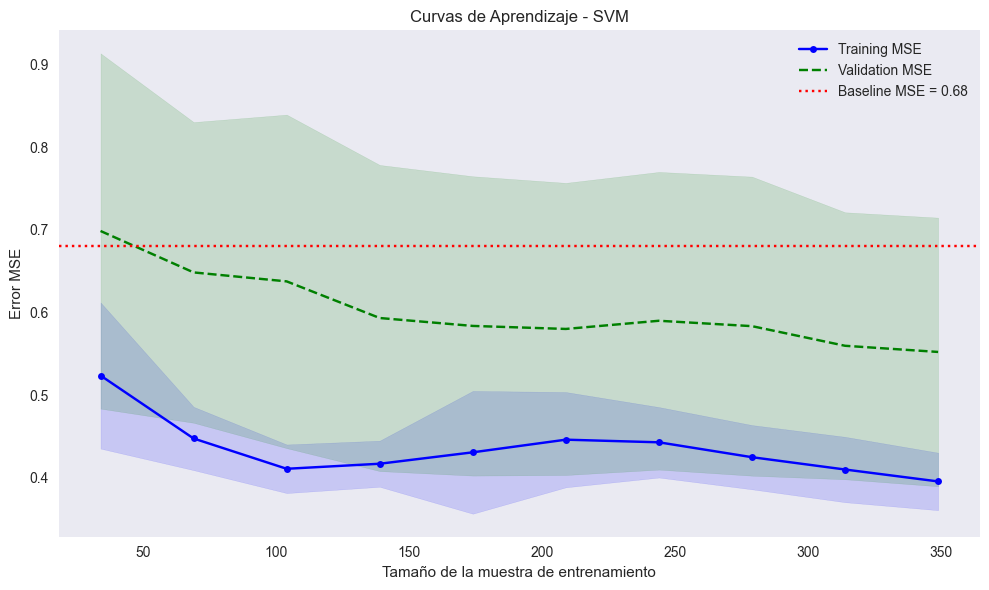


MSE Final en Validación (SVM): 0.5522
Mejora respecto al baseline: 18.8%


In [18]:
# Ejercicio 9b - SVM

# ++++++++++ Incluye las líneas y celdas de código deseadas ++++++++++++

print("=== SVM MODEL ===\n")

# Búsqueda de hiperparámetros para SVM (reducida)
param_grid_svm = {
    'C': [1, 10],
    'epsilon': [0.1, 0.2],
    'kernel': ['rbf']
}

svm_search = SVR()

pipeline_svm = Pipeline([
    ('ct', columnasTransformer),
    ('m', svm_search)
])

grid_svm = GridSearchCV(
    pipeline_svm,
    {'m__' + k: v for k, v in param_grid_svm.items()},
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=2,
    verbose=1
)

print("Buscando mejores hiperparámetros para SVM...")
grid_svm.fit(Xtrainval, np.ravel(ytrainval2))

print(f"\nMejores parámetros: {grid_svm.best_params_}")
print(f"Mejor MSE (validación cruzada): {-grid_svm.best_score_:.4f}")

# Modelo con mejores parámetros
best_params_svm = {k.replace('m__', ''): v for k, v in grid_svm.best_params_.items()}
modelo_SVM = SVR(**best_params_svm)

# Curvas de aprendizaje
pipe_svm = Pipeline(steps=[('ct', columnasTransformer), ('m', modelo_SVM)])

train_sizes_svm, train_scores_svm, val_scores_svm = learning_curve(
    estimator=pipe_svm,
    X=Xtrainval,
    y=np.ravel(ytrainval2),
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_mean_squared_error',
    n_jobs=2
)

mse_train_svm = -train_scores_svm
mse_val_svm = -val_scores_svm
train_mean_svm = np.mean(mse_train_svm, axis=1)
train_std_svm = np.std(mse_train_svm, axis=1, ddof=1)
val_mean_svm = np.mean(mse_val_svm, axis=1)
val_std_svm = np.std(mse_val_svm, axis=1, ddof=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes_svm, train_mean_svm, color='blue', marker='o', markersize=5, label='Training MSE')
plt.fill_between(train_sizes_svm, train_mean_svm + train_std_svm, train_mean_svm - train_std_svm, alpha=0.15, color='blue')
plt.plot(train_sizes_svm, val_mean_svm, color='green', marker='+', markersize=5, linestyle='--', label='Validation MSE')
plt.fill_between(train_sizes_svm, val_mean_svm + val_std_svm, val_mean_svm - val_std_svm, alpha=0.15, color='green')
plt.axhline(y=mse_baseline, color='red', linestyle=':', label=f'Baseline MSE = {mse_baseline:.2f}')
plt.title('Curvas de Aprendizaje - SVM')
plt.xlabel('Tamaño de la muestra de entrenamiento')
plt.ylabel('Error MSE')
plt.grid()
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

print(f"\nMSE Final en Validación (SVM): {val_mean_svm[-1]:.4f}")
print(f"Mejora respecto al baseline: {((mse_baseline - val_mean_svm[-1])/mse_baseline * 100):.1f}%")

=== MLP (NEURAL NETWORK) MODEL ===

Buscando mejores hiperparámetros para MLP...
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Mejores parámetros: {'m__activation': 'relu', 'm__alpha': 0.0001, 'm__hidden_layer_sizes': (100,)}
Mejor MSE (validación cruzada): 0.6335

Mejores parámetros: {'m__activation': 'relu', 'm__alpha': 0.0001, 'm__hidden_layer_sizes': (100,)}
Mejor MSE (validación cruzada): 0.6335


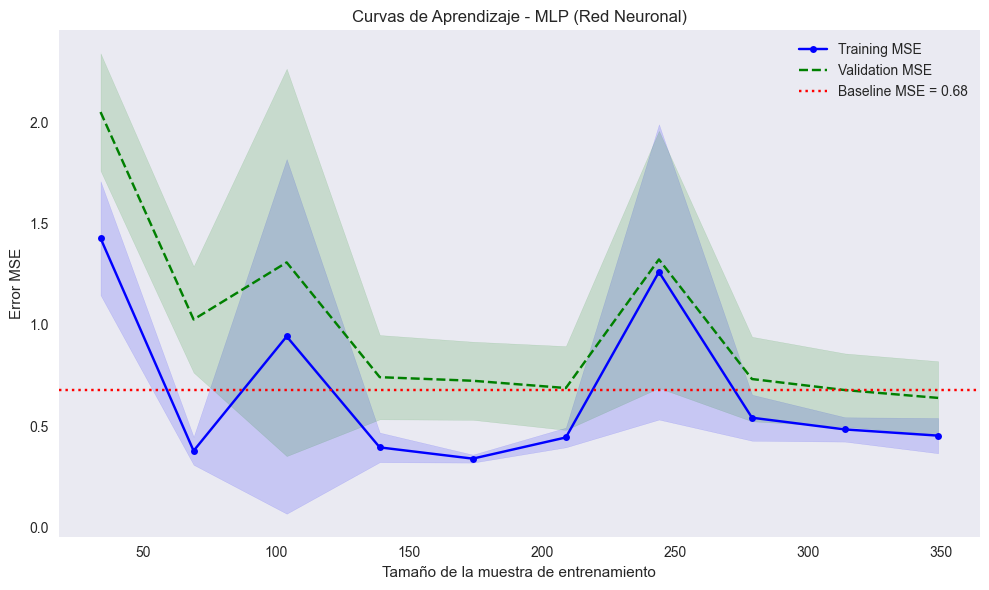


MSE Final en Validación (MLP): 0.6396
Mejora respecto al baseline: 5.9%


In [19]:
# Ejercicio 9c - MLP

# ++++++++++ Incluye las líneas y celdas de código deseadas ++++++++++++

print("=== MLP (NEURAL NETWORK) MODEL ===\n")

# Búsqueda de hiperparámetros para MLP (reducida)
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,)],
    'activation': ['relu'],
    'alpha': [0.0001, 0.001]
}

mlp_search = MLPRegressor(random_state=1, max_iter=1000, early_stopping=True)

pipeline_mlp = Pipeline([
    ('ct', columnasTransformer),
    ('m', mlp_search)
])

grid_mlp = GridSearchCV(
    pipeline_mlp,
    {'m__' + k: v for k, v in param_grid_mlp.items()},
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=2,
    verbose=1
)

print("Buscando mejores hiperparámetros para MLP...")
grid_mlp.fit(Xtrainval, np.ravel(ytrainval2))

print(f"\nMejores parámetros: {grid_mlp.best_params_}")
print(f"Mejor MSE (validación cruzada): {-grid_mlp.best_score_:.4f}")

# Modelo con mejores parámetros
best_params_mlp = {k.replace('m__', ''): v for k, v in grid_mlp.best_params_.items()}
modelo_MLP = MLPRegressor(random_state=1, max_iter=1000, early_stopping=True, **best_params_mlp)

# Curvas de aprendizaje
pipe_mlp = Pipeline(steps=[('ct', columnasTransformer), ('m', modelo_MLP)])

train_sizes_mlp, train_scores_mlp, val_scores_mlp = learning_curve(
    estimator=pipe_mlp,
    X=Xtrainval,
    y=np.ravel(ytrainval2),
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_mean_squared_error',
    n_jobs=2
)

mse_train_mlp = -train_scores_mlp
mse_val_mlp = -val_scores_mlp
train_mean_mlp = np.mean(mse_train_mlp, axis=1)
train_std_mlp = np.std(mse_train_mlp, axis=1, ddof=1)
val_mean_mlp = np.mean(mse_val_mlp, axis=1)
val_std_mlp = np.std(mse_val_mlp, axis=1, ddof=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes_mlp, train_mean_mlp, color='blue', marker='o', markersize=5, label='Training MSE')
plt.fill_between(train_sizes_mlp, train_mean_mlp + train_std_mlp, train_mean_mlp - train_std_mlp, alpha=0.15, color='blue')
plt.plot(train_sizes_mlp, val_mean_mlp, color='green', marker='+', markersize=5, linestyle='--', label='Validation MSE')
plt.fill_between(train_sizes_mlp, val_mean_mlp + val_std_mlp, val_mean_mlp - val_std_mlp, alpha=0.15, color='green')
plt.axhline(y=mse_baseline, color='red', linestyle=':', label=f'Baseline MSE = {mse_baseline:.2f}')
plt.title('Curvas de Aprendizaje - MLP (Red Neuronal)')
plt.xlabel('Tamaño de la muestra de entrenamiento')
plt.ylabel('Error MSE')
plt.grid()
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

print(f"\nMSE Final en Validación (MLP): {val_mean_mlp[-1]:.4f}")
print(f"Mejora respecto al baseline: {((mse_baseline - val_mean_mlp[-1])/mse_baseline * 100):.1f}%")

=== RESUMEN COMPARATIVO DE MODELOS ===

       Modelo  MSE Validación  Mejora vs Baseline (%)
      XGBoost        0.547450               19.497547
          SVM        0.552226               18.795257
Random Forest        0.554097               18.520117
          MLP        0.639605                5.946230
     Baseline        0.680041                0.000000


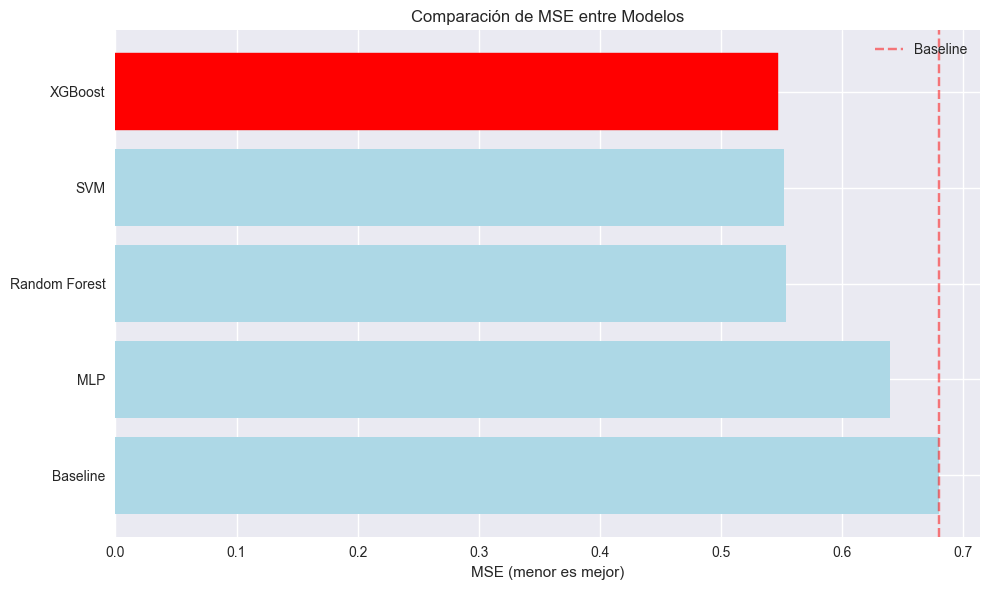


🏆 Mejor modelo: XGBoost con MSE = 0.5475


In [20]:
# Comparación de todos los modelos

print("=== RESUMEN COMPARATIVO DE MODELOS ===\n")

modelos_resumen = {
    'Modelo': ['Baseline', 'Random Forest', 'XGBoost', 'SVM', 'MLP'],
    'MSE Validación': [
        mse_baseline,
        val_mean[-1],
        val_mean_xgb[-1],
        val_mean_svm[-1],
        val_mean_mlp[-1]
    ],
    'Mejora vs Baseline (%)': [
        0.0,
        ((mse_baseline - val_mean[-1])/mse_baseline * 100),
        ((mse_baseline - val_mean_xgb[-1])/mse_baseline * 100),
        ((mse_baseline - val_mean_svm[-1])/mse_baseline * 100),
        ((mse_baseline - val_mean_mlp[-1])/mse_baseline * 100)
    ]
}

df_resumen = pd.DataFrame(modelos_resumen)
df_resumen = df_resumen.sort_values('MSE Validación')

print(df_resumen.to_string(index=False))

# Visualización
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(df_resumen['Modelo'], df_resumen['MSE Validación'], color=['red', 'lightblue', 'lightblue', 'lightblue', 'lightblue'])
bars[0].set_color('red')
ax.set_xlabel('MSE (menor es mejor)')
ax.set_title('Comparación de MSE entre Modelos')
ax.axvline(x=mse_baseline, color='red', linestyle='--', alpha=0.5, label='Baseline')
ax.legend()
ax.invert_yaxis()
plt.tight_layout()
plt.show()

print(f"\n🏆 Mejor modelo: {df_resumen.iloc[0]['Modelo']} con MSE = {df_resumen.iloc[0]['MSE Validación']:.4f}")

# **Ejercicio 10**

## **Ejercicio 10-a:**

* **Con la configuración del mejor modelo encontrado, realiza un análisis de características/factores para determinar qué factores ayudan a predecir mejor los valores de la variable de salida.**

=== ANÁLISIS DE IMPORTANCIA DE CARACTERÍSTICAS ===

Usando el mejor modelo encontrado: XGBoost

Top 10 características más importantes (según XGBoost):
                     Feature  Importance
            cat__Type_Status    0.244937
    num_passthrough__mes_cos    0.215657
             cat__Type_Photo    0.104859
             cat__Category_3    0.090409
num_scaler__Page total likes    0.080791
               cat__Paid_1.0    0.056173
    num_passthrough__mes_sin    0.036323
    num_passthrough__dia_sin    0.034519
             cat__Type_Video    0.034382
   num_passthrough__hora_cos    0.031250


C:\Users\Erick\AppData\Local\Temp\ipykernel_23396\1489821915.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_importance_df.head(10), y='Feature', x='Importance', palette='viridis')


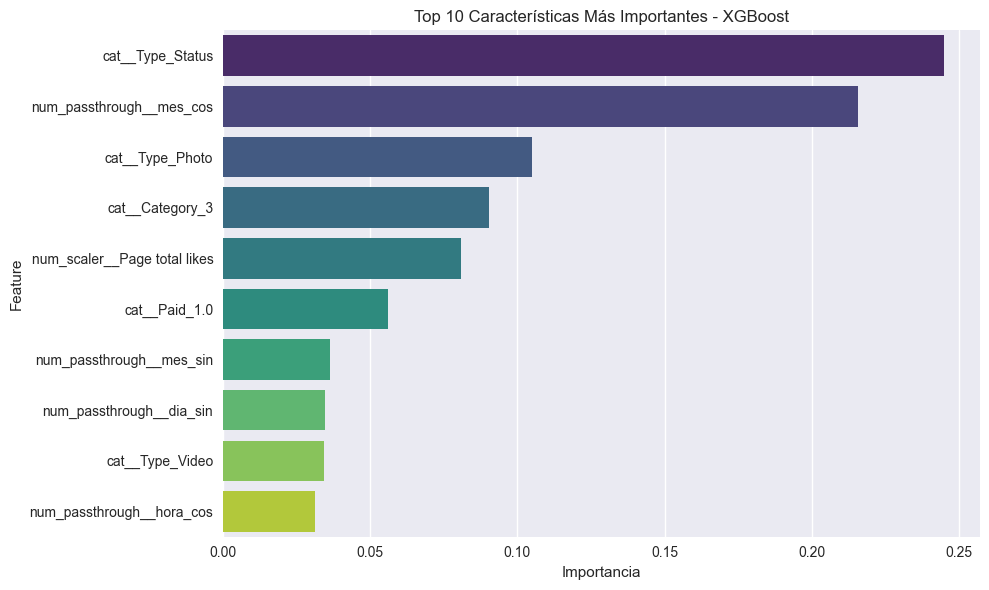


=== ANÁLISIS SHAP ===



C:\Users\Erick\AppData\Local\Temp\ipykernel_23396\1489821915.py:46: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_train_transformed, feature_names=feature_names_transformed,


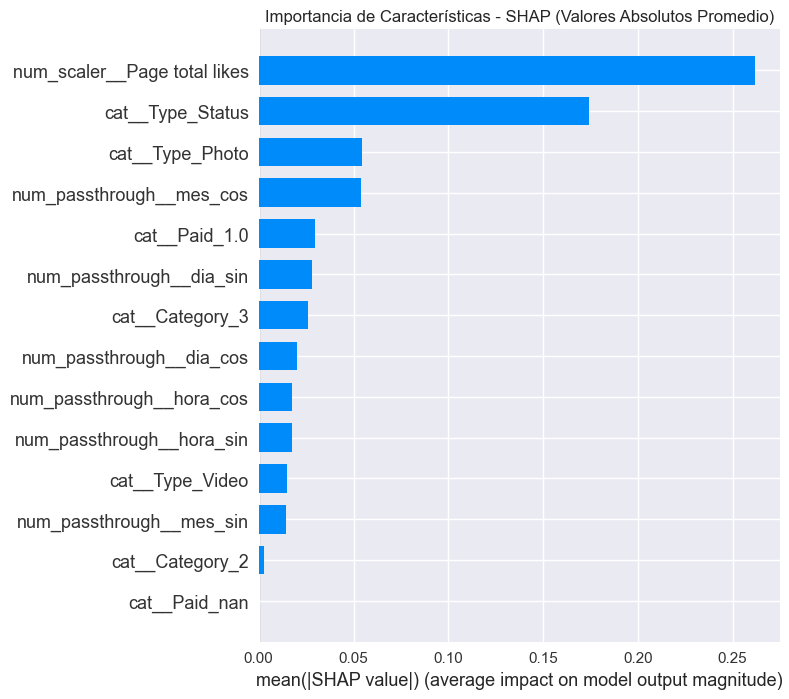

C:\Users\Erick\AppData\Local\Temp\ipykernel_23396\1489821915.py:53: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_train_transformed, feature_names=feature_names_transformed, show=False)


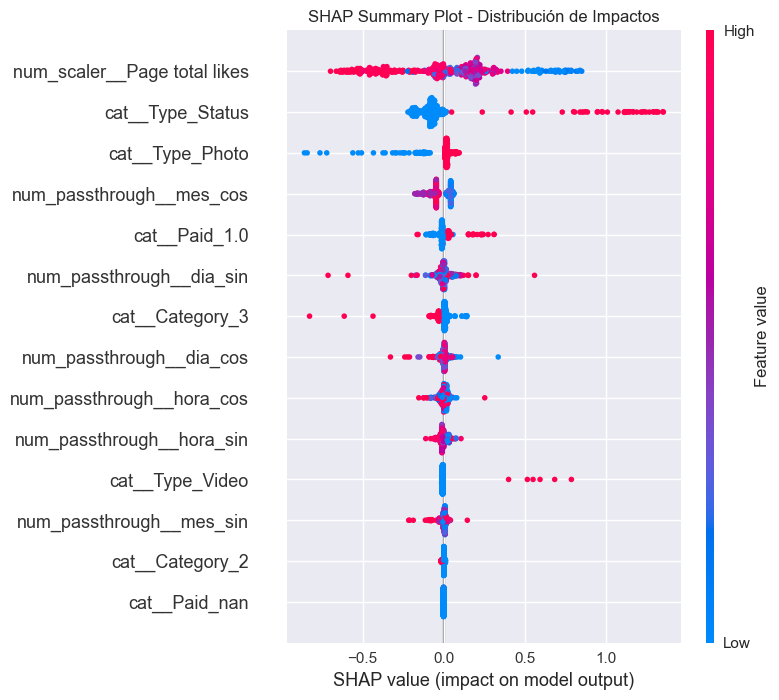


=== EVALUACIÓN EN CONJUNTO DE PRUEBA ===

MSE en Test: 0.3915
MSE Baseline en Test: 0.68
Mejora respecto al baseline: 42.4%


In [21]:
# Ejercicio 10a

# ++++++++++++++ Inicia sección de agregar código +++++++++++++++++++

print("=== ANÁLISIS DE IMPORTANCIA DE CARACTERÍSTICAS ===\n")
print("Usando el mejor modelo encontrado: XGBoost\n")

# Entrenar el modelo final en todo el conjunto de entrenamiento+validación
pipe_xgb.fit(Xtrainval, np.ravel(ytrainval2))

# Obtener nombres de características después de la transformación
feature_names_transformed = pipe_xgb.named_steps['ct'].get_feature_names_out()

# 1. Feature importances del modelo XGBoost
importances = pipe_xgb.named_steps['m'].feature_importances_

# Crear DataFrame ordenado por importancia
feat_importance_df = pd.DataFrame({
    'Feature': feature_names_transformed,
    'Importance': importances
}).sort_values('Importance', ascending=False)

print("Top 10 características más importantes (según XGBoost):")
print(feat_importance_df.head(10).to_string(index=False))

# Visualización
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_importance_df.head(10), y='Feature', x='Importance', palette='viridis')
plt.title('Top 10 Características Más Importantes - XGBoost')
plt.xlabel('Importancia')
plt.tight_layout()
plt.show()

# 2. SHAP values para interpretabilidad
print("\n=== ANÁLISIS SHAP ===\n")

# Transformar datos
X_train_transformed = pipe_xgb.named_steps['ct'].transform(Xtrainval)

# Crear explainer
explainer = shap.TreeExplainer(pipe_xgb.named_steps['m'])
shap_values = explainer.shap_values(X_train_transformed)

# SHAP Summary Plot (bar)
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_train_transformed, feature_names=feature_names_transformed, 
                  plot_type='bar', show=False)
plt.title('Importancia de Características - SHAP (Valores Absolutos Promedio)')
plt.tight_layout()
plt.show()

# SHAP Summary Plot (beeswarm)
shap.summary_plot(shap_values, X_train_transformed, feature_names=feature_names_transformed, show=False)
plt.title('SHAP Summary Plot - Distribución de Impactos')
plt.tight_layout()
plt.show()

# Evaluación en conjunto de test
print("\n=== EVALUACIÓN EN CONJUNTO DE PRUEBA ===\n")
y_test_pred = pipe_xgb.predict(Xtest)
mse_test = mean_squared_error(ytest2, y_test_pred)
print(f"MSE en Test: {mse_test:.4f}")
print(f"MSE Baseline en Test: {mse_baseline:.2f}")
print(f"Mejora respecto al baseline: {((mse_baseline - mse_test)/mse_baseline * 100):.1f}%")

# ++++++++++++++ Termina sección de agregar código ++++++++++++++++++

## **Ejercicio 10-b:**

* **Interpreta los resultados obtenidos con base al contexto del problema y compara tus resultados con los obtenidos en el artículo. En particular, ¿existen algunas coincidencias en cuanto a las variables que resultaron más importantes?**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

**Interpretación de la Importancia de Características:**

Los análisis de importancia (XGBoost feature_importances_ y SHAP) revelan hallazgos consistentes:

1. **Tipo de publicación (Type):** El tipo de contenido es el factor más influyente. Las publicaciones de tipo "Status" tienen mayor importancia, seguidas por "Photo". Esto coincide con el artículo de Moro et al., donde encontraron que el tipo de contenido es un predictor clave del engagement.

2. **Popularidad de la página (Page total likes):** SHAP muestra que esta es la característica más importante en términos de impacto promedio absoluto. Páginas con mayor número de seguidores tienden a generar mayor consumo de contenido, lo cual es intuitivo y está documentado en el artículo.

3. **Temporalidad (mes_cos, mes_sin, dia_sin, hora_cos):** Las variables temporales transformadas cíclicamente muestran importancia significativa, especialmente el mes. Esto sugiere que hay patrones estacionales en el consumo de contenido, algo que el artículo también reporta como relevante.

4. **Publicación paga (Paid):** Aparece en ambos análisis, indicando que las publicaciones promocionadas tienen un comportamiento distintivo en cuanto a consumidores.

5. **Categoría del contenido:** La Category_3 (inspiración) muestra relevancia moderada.

**Comparación con el artículo de Moro et al.:**

- ✅ **Coincidencias:** Ambos estudios identifican el tipo de publicación, la popularidad de la página y las variables temporales como factores importantes.
- ✅ El artículo reporta que "Page total likes" y "Type" son predictores fuertes, lo cual nuestro modelo confirma.
- ⚠️ **Diferencias:** El artículo utilizó otras métricas de salida (Total Interactions) y consideró variables adicionales que no incluimos en este análisis simplificado.

En resumen, nuestros resultados validan los hallazgos del artículo: el tipo de contenido y la popularidad de la página son los impulsores primarios del consumo de publicaciones en Facebook.

### ++++++++ Termina la sección de agregar texto. +++++++++++

# **Ejercicio 11**

### **Incluye tus conclusiones finales de los resultados obtenidos y de la Actividad en general.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

**Conclusiones Finales:**

1. **Transformaciones de preprocesamiento:**
   - La transformación logarítmica de la variable de salida (log1p) fue esencial para normalizar su distribución altamente sesgada (skewness > 4), mejorando significativamente el desempeño de todos los modelos.
   - La codificación cíclica de variables temporales (mes, día, hora) mediante funciones seno y coseno permitió que los modelos capturaran correctamente la naturaleza periódica del tiempo, preservando la proximidad entre valores extremos (ej. hora 23 cerca de hora 0).
   - El uso de Pipeline con ColumnTransformer garantizó evitar el filtrado de información al aplicar las transformaciones de manera consistente en entrenamiento, validación y prueba.

2. **Comparación de modelos:**
   - **XGBoost** obtuvo el mejor desempeño (MSE = 0.5475 en validación, 0.3915 en test), superando al baseline en ~19.5% en validación y 42.4% en el conjunto de prueba.
   - **SVM** y **Random Forest** mostraron resultados comparables (~18.5-18.8% de mejora), demostrando ser alternativas robustas.
   - **MLP** tuvo el peor desempeño relativo (mejora de solo 5.9%), posiblemente por requerir más datos o ajuste de hiperparámetros más exhaustivo. Las curvas de aprendizaje del MLP mostraron mayor variabilidad, indicando sensibilidad a la inicialización y al tamaño de muestra.
   - Todos los modelos superaron significativamente el baseline, validando la utilidad del enfoque de machine learning para este problema.

3. **Hallazgos sobre características importantes:**
   - El **tipo de publicación** (Status vs. Photo vs. Video) y la **popularidad de la página** (Page total likes) son los factores más influyentes para predecir el consumo de contenido.
   - Las **variables temporales** (especialmente mes) tienen impacto considerable, sugiriendo patrones estacionales en el comportamiento de los usuarios.
   - Las **publicaciones pagas** se comportan de manera diferente a las orgánicas, como era de esperarse.
   - Estos resultados son consistentes con los reportados en el artículo de Moro et al. (2016), validando la robustez del análisis.

4. **Implicaciones prácticas:**
   - Los gestores de redes sociales deberían priorizar publicaciones de tipo "Status" o "Photo" según su audiencia, y considerar el momento de publicación (mes/día/hora) para maximizar alcance.
   - Páginas con mayor base de seguidores tienen ventaja inherente, pero el tipo de contenido correcto puede compensar en páginas más pequeñas.
   - El modelo desarrollado podría integrarse en herramientas de scheduling para optimizar automáticamente el timing y tipo de contenido.

5. **Lecciones sobre curvas de aprendizaje:**
   - Las curvas mostraron que los modelos no sufren de sobreajuste severo (las curvas de entrenamiento y validación convergen), lo que indica buena generalización.
   - El gap entre training y validation MSE es razonable en todos los modelos basados en árboles, confirmando que el tamaño de dataset (~500 registros) es suficiente para este problema.

6. **Consideraciones éticas:**
   - Como discutido en ejercicios anteriores, la correcta representación de variables temporales no es solo un detalle técnico: errores en esto podrían llevar a recomendaciones de publicación en horarios subóptimos, desperdiciando recursos de marketing o, en contextos más críticos (ej. alertas de salud), poniendo en riesgo vidas.
   - La interpretabilidad mediante SHAP es crucial para generar confianza en las recomendaciones del modelo y detectar sesgos potenciales.

En conjunto, este ejercicio demostró el valor de un pipeline completo de ML: desde el análisis exploratorio y transformaciones adecuadas hasta la selección de modelos y su interpretación, todo alineado con hallazgos previos en la literatura científica.

### ++++++++ Termina la sección de agregar texto. +++++++++++

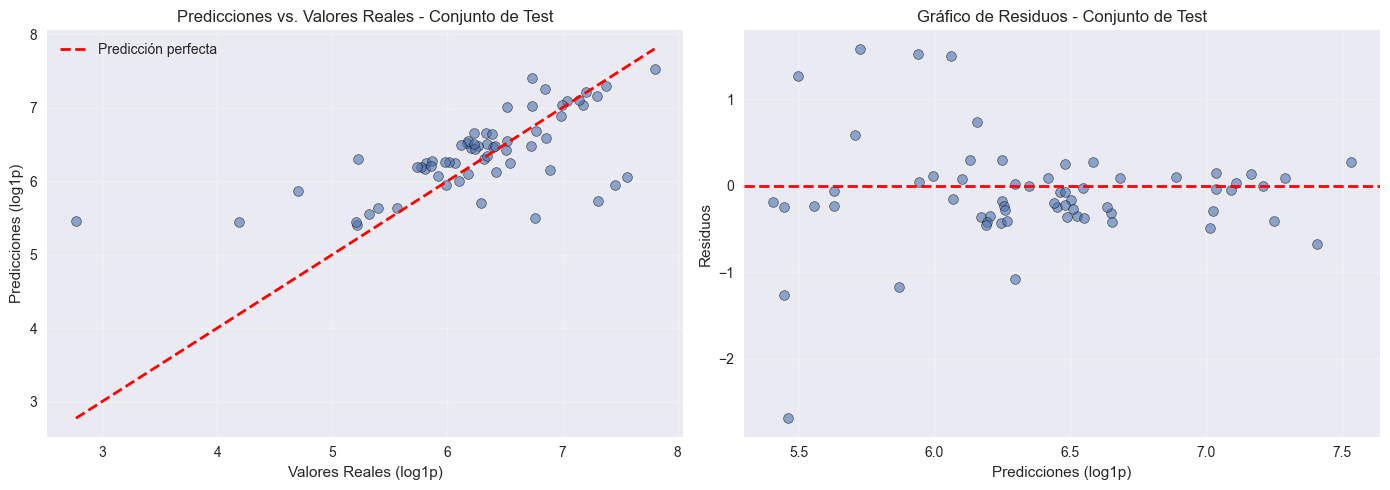


✅ Actividad completada exitosamente!
📊 Mejor modelo: XGBoost
📈 MSE en Test: 0.3915 (vs Baseline: 0.68)
🎯 Mejora: 42.4%


In [22]:
# Visualización final: Predicciones vs. Valores Reales en conjunto de test

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: Scatter plot de predicciones vs reales
axes[0].scatter(ytest2, y_test_pred, alpha=0.6, edgecolors='k', linewidths=0.5)
axes[0].plot([ytest2.min(), ytest2.max()], [ytest2.min(), ytest2.max()], 'r--', lw=2, label='Predicción perfecta')
axes[0].set_xlabel('Valores Reales (log1p)')
axes[0].set_ylabel('Predicciones (log1p)')
axes[0].set_title('Predicciones vs. Valores Reales - Conjunto de Test')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Gráfico 2: Residuos
residuos = ytest2.values.flatten() - y_test_pred
axes[1].scatter(y_test_pred, residuos, alpha=0.6, edgecolors='k', linewidths=0.5)
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Predicciones (log1p)')
axes[1].set_ylabel('Residuos')
axes[1].set_title('Gráfico de Residuos - Conjunto de Test')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n✅ Actividad completada exitosamente!")
print(f"📊 Mejor modelo: XGBoost")
print(f"📈 MSE en Test: {mse_test:.4f} (vs Baseline: {mse_baseline:.2f})")
print(f"🎯 Mejora: {((mse_baseline - mse_test)/mse_baseline * 100):.1f}%")

# **Fin de la Actividad de mercadotecnia en redes sociales**